# Implementation of UCB algorithm

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [7]:
class Environment:
    def __init__(self, n_arms) :
        self.q_star = np.random.normal(0,1,n_arms)
        self.optimal_arm = np.argmax(self.q_star)
    
    def give_reward(self, action) :
        return 1 if (np.random.random()  < self.q_star[action]) else 0
    
    def check_optimal(self, action) :
        return 1 if (action == self.optimal_arm) else 0

In [8]:
class Agent:
    def __init__(self, n_arms) :
        self.arms = n_arms
        self.n = np.zeros((n_arms,1), dtype=int)#count for no of times each action is pulled
        self.q = np.zeros((n_arms,1), dtype=float)#estimated reward for each action
    
    def take_action(self) :
        n = np.sum(self.n)
        nr = np.log(n)
        term = []
        for arm in range(self.arms) :
            temp = self.q[arm] + np.sqrt(float(nr / self.n[arm]))
            term.append(temp)
        return np.argmax(term)
        
    def update_rule(self, action, reward) :
        self.n[action] = self.n[action] + 1
        self.q[action] = self.q[action] + (1.0 / (self.n[action] + 1)) * (reward - self.q[action])  

In [9]:
def experiment(n_arms, n_episodes) :
    env = Environment(n_arms)
    agent = Agent(n_arms)
    actions = []
    rewards = []
    #initialization phase
    for action in range(n_arms) :
        reward = env.give_reward(action)
        agent.update_rule(action, reward)
        actions .append(env.check_optimal(action))
        rewards.append(reward)
    for episode in range(n_arms, n_episodes) :
        action = agent.take_action()
        reward = env.give_reward(action)
        agent.update_rule(action, reward)
        actions .append(env.check_optimal(action))
        rewards.append(reward)
    #actions = (actions * 100) / n_episodes
    return actions, rewards


In [10]:
def main(n_probs, n_episodes, n_arms) :
    avg_rewards = []
    optimal_arms = []
    for prob in range(n_probs) :
        actions, rewards = experiment(n_arms, n_episodes)
        avg_rewards.append(rewards)
        optimal_arms.append(actions)
    #print(avg_rewards, optimal_arms)
    rewards = np.mean(avg_rewards, axis = 0)
    actions = np.sum(optimal_arms, axis = 0)
    actions_avg = []
    for x in actions:
        x = (x * 100) / n_probs
        actions_avg.append(x)
    #print(Rewards)
    #print(Actions)
    #print(np.shape(rewards), np.shape(actions))
    steps = [i for i in range(n_episodes)]
    plt.xlabel("Steps")
    plt.ylabel("Avg rewards")
    plt.plot(steps, rewards)
    plt.show()
    plt.xlabel("Steps")
    plt.ylabel("% Optimal Action")
    plt.plot(steps, actions_avg)
    plt.show()
    

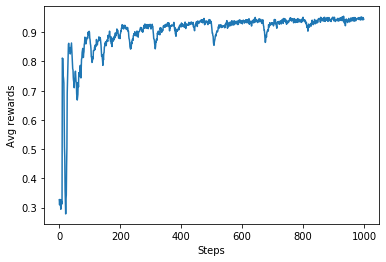

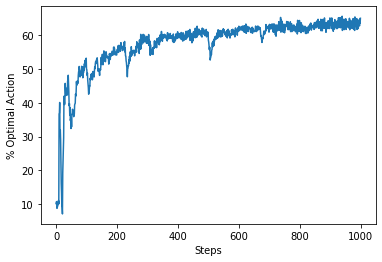

In [11]:
main(2000,1000,10)